In [4]:
import networkx as nx
import matplotlib.pyplot as plt

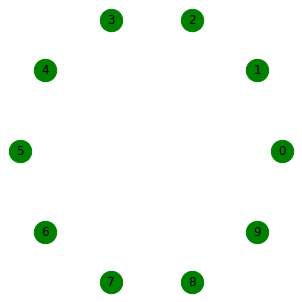

In [4]:
# 1.创建孤立节点图
n = 10
g1 = nx.Graph()
g1.add_nodes_from(range(n))
plt.figure(figsize=(4,4))
nx.draw(g1, pos=nx.circular_layout(g1), node_size = 500, node_color="green", with_labels=True)

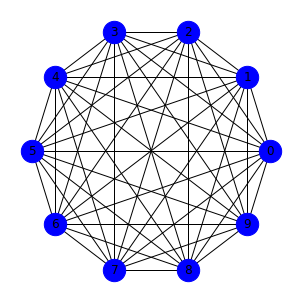

In [5]:
# 2.创建完全图
g2 = nx.complete_graph(n)
plt.figure(figsize=(4,4))
nx.draw(g2, pos=nx.circular_layout(g2), node_size=500, node_color="blue", with_labels=True)

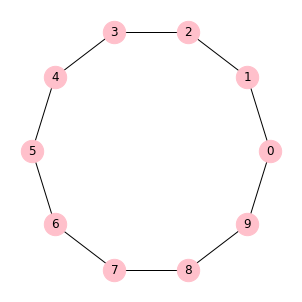

In [7]:
# 3.创建一维环状图
g3 = nx.cycle_graph(n)
plt.figure(figsize=(4,4))
nx.draw(g3, pos=nx.circular_layout(g3), node_size=500, node_color="pink", with_labels=True)

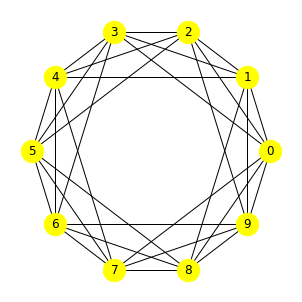

In [10]:
# 4.创建K近邻耦合图
g4 = nx.watts_strogatz_graph(n, 6, 0)  # 6-近邻耦合图
plt.figure(figsize=(4,4))
nx.draw(g4, pos=nx.circular_layout(g4), node_size=500, node_color="yellow", with_labels=True)

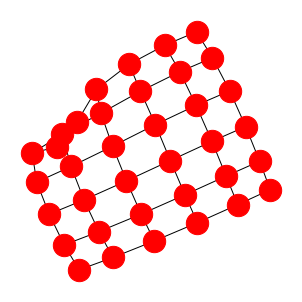

In [21]:
# 5.创建二维方格图
g5 = nx.grid_graph((6, 6), periodic=False)
plt.figure(figsize=(4,4))
nx.draw(g5, node_size=500, node_color="red", with_labels=False)

In [1]:
# 创建随机网络
import random
import itertools

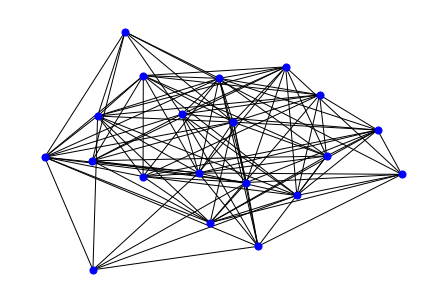

In [12]:
# 1.创建gnp网络
def gnp(n, p):
    edge_list = itertools.combinations(range(n), 2)  # 所有的节点对
    g = nx.Graph()
    g.add_nodes_from(range(n))  # 图中初始包含n个孤立节点
    for e in edge_list:
        # 依概率p生成边
        if random.random() < p:
            g.add_edge(*e)
    return g

gnp_g = gnp(20, 0.6)
nx.draw(gnp_g, node_size=50, node_color="blue", with_labels=False)

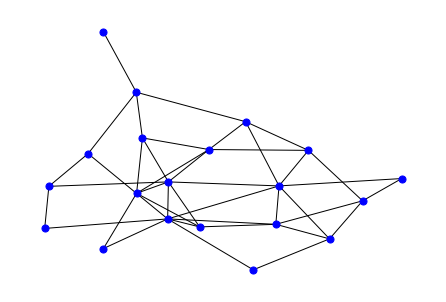

In [15]:
# 2.创建gnl网络
def gnl(n, l):
    g = nx.Graph()
    g.add_nodes_from(range(n))  # 图中初始有n个孤立节点
    node_list = list(g.nodes)
    edge_count = 0
    while edge_count < l:
        # 随机选择一对节点
        u = random.choice(node_list)
        v = random.choice(node_list)
        # 如果u == v或者u、v间已有连边
        if u == v or g.has_edge(u, v):  
            continue
        else:
            g.add_edge(u, v)
            edge_count += 1
    return g 

gnl_g = gnl(20, 40)
nx.draw(gnl_g, node_size=50, node_color="blue", with_labels=False)

Text(0.5, 1.0, 'G(N,p)')

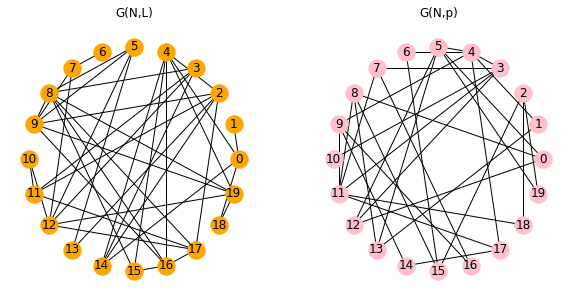

In [21]:
# 直接调用库函数生成随即网络
g6 = nx.gnm_random_graph(20, 40)
g7 = nx.gnp_random_graph(20, 0.2)

plt.figure(figsize=(10,5))

plt.subplot(121)
nx.draw(g6, pos=nx.circular_layout(g6), node_size=300, node_color="orange", with_labels=True)
plt.title("G(N,L)")

plt.subplot(122)
nx.draw(g7, pos=nx.circular_layout(g7), node_size=300, node_color="pink", with_labels=True)
plt.title("G(N,p)")